# Graded Challenge 2

- Andik Al Fauzi - FTDS-RMT-018

# SQL Query to get data from Big Query

In [82]:
# Load Data from Google Big Query

# SELECT report_date,load_time, load_type, load_weight, dropoff_site FROM bigquery-public-data.austin_waste.waste_and_diversion
# WHERE report_date BETWEEN '2021-01-01' AND '2021-12-31'

# Data Preparation

In [2]:
# Install Library Matplotlib

!pip install matplotlib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [83]:
# Importing Library

import pandas as pd
import numpy as np
from numpy import percentile
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
import statistics

In [4]:
# Load Data CSV

df = pd.read_csv('/content/h8dsft_P0W2_Andik_Al_Fauzi.csv')

In [5]:
# Create a copy data
# Reason : make sure the original data is untouchable

dfCopy = df.copy()

In [6]:
# show 10 row of data

dfCopy.head()

,report_date,load_time,load_type,load_weight,dropoff_site
0,2021-07-08,2021-07-08 12:00:00.000000 UTC,TIRES,2260.0,MRF
1,2021-07-08,2021-07-08 11:00:00.000000 UTC,TIRES,1260.0,MRF
2,2021-07-08,2021-07-08 03:00:00.000000 UTC,TIRES,800.0,MRF
3,2021-05-01,2021-05-01 12:29:00.000000 UTC,TIRES,760.0,MRF
4,2021-07-03,2021-07-03 12:09:00.000000 UTC,TIRES,1400.0,MRF


In [7]:
# Cek row & column data

dfCopy.shape

(26157, 5)

In [8]:
# Cek data 

dfCopy.describe()

,load_weight
count,25109.000000
mean,12227.136307
std,7135.059565
min,0.000000
25%,7060.000000
50%,11300.000000
75%,16380.000000
max,245540.000000


In [9]:
# Cek data type

dfCopy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26157 entries, 0 to 26156
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   report_date   26157 non-null  object 
 1   load_time     26157 non-null  object 
 2   load_type     26157 non-null  object 
 3   load_weight   25109 non-null  float64
 4   dropoff_site  26157 non-null  object 
dtypes: float64(1), object(4)
memory usage: 1021.9+ KB


In [10]:
# Convert kolom report_date to datetime

dfCopy['report_date'] = pd.to_datetime(dfCopy['report_date'])

# Inserting new date format
# reason : karena jika pakai kolom lama maka ada beberapa internal error jika dipanggil variable nya untuk kemudian di plot

dfCopy['date'] = dfCopy['report_date'].dt.date

# Convert kolom load_weight to float
dfCopy['load_weight'] = dfCopy['load_weight'].astype(float)

In [11]:
# Drop column load_time & report_time because it's unnecessary

dfCopy.drop(['load_time'], axis=1, inplace=True)
dfCopy.drop(['report_date'], axis=1, inplace=True)

In [12]:
# Cek status convert & drop

dfCopy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26157 entries, 0 to 26156
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   load_type     26157 non-null  object 
 1   load_weight   25109 non-null  float64
 2   dropoff_site  26157 non-null  object 
 3   date          26157 non-null  object 
dtypes: float64(1), object(3)
memory usage: 817.5+ KB


In [13]:
# Cek maximal date from `report_date` column

dfCopy['date'].max()

datetime.date(2021, 7, 9)

note : check the data whether it is in accordance with what is informed in the Assignment (max data on July 09, 2021).

In [14]:
# Cek total data null

dfCopy.isnull().sum()

load_type          0
load_weight     1048
dropoff_site       0
date               0
dtype: int64

Di dalam column `load_weight` terdapat 1048 baris missing value

# Problem 1.1 Handle Missing Value

In [15]:
# Insert Missing Value in load_weight with mean
# Reason : Karena kemungkinan missing value tersebut dapat diisi dengan rata-rata sampah yang diangkut pada setiap sitenya

dfCopy.fillna(dfCopy['load_weight'].mean(), inplace=True)

In [16]:
# Cek data null yang sudah diinsert

dfCopy.isnull().sum()

load_type       0
load_weight     0
dropoff_site    0
date            0
dtype: int64

Note : replace data null sudah berhasil dengan memasukan nilai mean dari kolom `load_weight`

# Problem 1.2.1 : Melihat rentang waktu pengambilan data

In [17]:
# Cek total data

dfCopy['date'].max() - dfCopy['date'].min()

datetime.timedelta(days=189)

# Problem 1.2.2 : Ada apa saja tipe load sampah di kota Austin berdasarkan data

In [18]:
# Cek Unique Data kolom load_type

dfCopy.load_type.unique()

array(['TIRES', 'RECYCLING - SINGLE STREAM', 'SWEEPING', 'BRUSH',
       'GARBAGE COLLECTIONS', 'YARD TRIMMING', 'BULK', 'ORGANICS',
       'DEAD ANIMAL', 'MIXED LITTER', 'LITTER', 'RECYCLED METAL',
       'CONTAMINATED RECYCLING', 'CONTAMINATED ORGANICS'], dtype=object)

In [19]:
# Cek unique di kolom dropoff_site

dfCopy.dropoff_site.unique()

array(['MRF', 'TDS - MRF', 'ONION CREEK', 'PARK CENTER', 'HORNSBY BEND',
       'TDS LANDFILL', 'GREAT NORTHERN', 'ORGANICS BY GOSH',
       'BALCONES RECYCLING', 'ON ROUTE HIGH DUMP',
       'AUSTIN IRON AND METAL', 'PARK BEND', 'BALCONES WOODS',
       'STEINER LANDFILL', 'WESTFIELD', 'ST. EDWARDS',
       'AUSTIN WOOD RECYCLING', 'WILCAB'], dtype=object)

In [20]:
# Cek Total Data di masing-masing load_type

dfCopy['load_type'].value_counts()

GARBAGE COLLECTIONS          8242
RECYCLING - SINGLE STREAM    6760
ORGANICS                     5763
BULK                         1594
BRUSH                        1517
SWEEPING                     1390
MIXED LITTER                  329
TIRES                         175
DEAD ANIMAL                   150
YARD TRIMMING                 137
RECYCLED METAL                 57
LITTER                         41
CONTAMINATED RECYCLING          1
CONTAMINATED ORGANICS           1
Name: load_type, dtype: int64

Note : 
- ada 14 jenis sampah yang ada di lokasi pembuangan sampah di negara Austin dan yang paling banyak adalah sampah rumah tangga

# Problem 1.2.3 : Mengetahui tempat pembuangan sampah ada dimana saja

In [21]:
# Cek Banyak data di masing-masing dropoff_site

dfCopy['dropoff_site'].value_counts()

TDS LANDFILL             10694
ORGANICS BY GOSH          5755
BALCONES RECYCLING        3837
TDS - MRF                 2948
HORNSBY BEND              1655
ONION CREEK                813
MRF                        168
ON ROUTE HIGH DUMP          81
PARK CENTER                 75
GREAT NORTHERN              70
AUSTIN IRON AND METAL       50
PARK BEND                    4
AUSTIN WOOD RECYCLING        2
BALCONES WOODS               1
STEINER LANDFILL             1
WESTFIELD                    1
ST. EDWARDS                  1
WILCAB                       1
Name: dropoff_site, dtype: int64

Kesimpulan : 
- ada 18 site sampah yang ada di lokasi pembuangan sampah di negara Austin

# Problem 1.3 : Central Tendency untuk Beginning Insight

In [22]:
# Cek data maximal di load_weight

dfCopy['load_weight'].max()

245540.0

In [23]:
# Cek data minimal di load_weight

dfCopy['load_weight'].min()

0.0

In [24]:
# Nilai Mean kolom dropoff_site & load_weight

dfCopy.groupby(dfCopy['dropoff_site'], sort=True)['load_weight'].mean()

dropoff_site
AUSTIN IRON AND METAL      451.200000
AUSTIN WOOD RECYCLING     4050.000000
BALCONES RECYCLING        9464.652072
BALCONES WOODS            8460.000000
GREAT NORTHERN           12820.810338
HORNSBY BEND              6638.792392
MRF                       1799.982143
ON ROUTE HIGH DUMP       12252.939342
ONION CREEK              12227.136307
ORGANICS BY GOSH         11819.476266
PARK BEND                13385.000000
PARK CENTER              12227.136307
ST. EDWARDS              12227.136307
STEINER LANDFILL           780.000000
TDS - MRF                 9872.550882
TDS LANDFILL             15168.581817
WESTFIELD                16020.000000
WILCAB                   12227.136307
Name: load_weight, dtype: float64

note : berikut adalah data mean di masing-masing tempat pembuangan sampah

In [25]:
# Nilai Median kolom dropoff_site & load_weight

dfCopy.groupby(dfCopy['dropoff_site'], sort=True)['load_weight'].median()

dropoff_site
AUSTIN IRON AND METAL      400.000000
AUSTIN WOOD RECYCLING     4050.000000
BALCONES RECYCLING        9840.000000
BALCONES WOODS            8460.000000
GREAT NORTHERN           12227.136307
HORNSBY BEND              6400.000000
MRF                       1360.000000
ON ROUTE HIGH DUMP       12227.136307
ONION CREEK              12227.136307
ORGANICS BY GOSH         11920.000000
PARK BEND                12330.000000
PARK CENTER              12227.136307
ST. EDWARDS              12227.136307
STEINER LANDFILL           780.000000
TDS - MRF                10330.000000
TDS LANDFILL             14920.000000
WESTFIELD                16020.000000
WILCAB                   12227.136307
Name: load_weight, dtype: float64

note : berikut adalah data median di masing-masing tempat pembuangan sampah

In [26]:
# Mencari Nilai Modus di kolom dropoff_site

dfCopy['dropoff_site'].mode()

0    TDS LANDFILL
dtype: object

Note : Tempat Pembuangan Sampah yang paling banyak dipilih adalah TDS LANDFILL

In [27]:
# Persiapan awal data untuk dianalisa

dfCopy.groupby(dfCopy['dropoff_site'], sort=True)['load_weight'].apply(pd.Series.mode).to_frame()

load_weight
dropoff_site                         
AUSTIN IRON AND METAL 0    260.000000
                      1    320.000000
                      2    520.000000
AUSTIN WOOD RECYCLING 0   2340.000000
                      1   5760.000000
BALCONES RECYCLING    0  11880.000000
BALCONES WOODS        0   8460.000000
GREAT NORTHERN        0  12227.136307
HORNSBY BEND          0   5500.000000
MRF                   0    960.000000
ON ROUTE HIGH DUMP    0  12227.136307
ONION CREEK           0  12227.136307
ORGANICS BY GOSH      0  14580.000000
PARK BEND             0   8480.000000
                      1   8960.000000
                      2  15700.000000
                      3  20400.000000
PARK CENTER           0  12227.136307
ST. EDWARDS           0  12227.136307
STEINER LANDFILL      0    780.000000
TDS - MRF             0  10360.000000
TDS LANDFILL          0     20.000000
                      1     60.000000
                      2  12020.000000
WESTFIELD             0  16020.000000
WILCAB                0  12227.136307

In [28]:
# Lihat banyak data berdasarkan tipe sampah

dfCopy['load_type'].value_counts()

GARBAGE COLLECTIONS          8242
RECYCLING - SINGLE STREAM    6760
ORGANICS                     5763
BULK                         1594
BRUSH                        1517
SWEEPING                     1390
MIXED LITTER                  329
TIRES                         175
DEAD ANIMAL                   150
YARD TRIMMING                 137
RECYCLED METAL                 57
LITTER                         41
CONTAMINATED RECYCLING          1
CONTAMINATED ORGANICS           1
Name: load_type, dtype: int64

dari tipe sampah diatas, maka akan dipilih tipe sampah `RECYCLING - SINGLE STREAM` untuk dianalisa lebih lanjut

In [29]:
# Mengelompokan data berdasarkan `RECYCLING - SINGLE STREAM` di kolom `load_type`

dfRecycle = dfCopy.loc[dfCopy['load_type'] == 'RECYCLING - SINGLE STREAM']
dfRecycle

,load_type,load_weight,dropoff_site,date
15,RECYCLING - SINGLE STREAM,700.0,TDS - MRF,2021-05-01
16,RECYCLING - SINGLE STREAM,720.0,TDS - MRF,2021-06-12
17,RECYCLING - SINGLE STREAM,300.0,TDS - MRF,2021-03-06
1051,RECYCLING - SINGLE STREAM,3260.0,BALCONES RECYCLING,2021-02-11
1052,RECYCLING - SINGLE STREAM,5300.0,BALCONES RECYCLING,2021-02-11
...,...,...,...,...
25989,RECYCLING - SINGLE STREAM,9220.0,TDS - MRF,2021-03-01
25990,RECYCLING - SINGLE STREAM,11780.0,TDS - MRF,2021-03-01
25991,RECYCLING - SINGLE STREAM,4180.0,TDS - MRF,2021-03-01
25992,RECYCLING - SINGLE STREAM,15080.0,TDS - MRF,2021-03-01


In [30]:
# Mencari total data `RECYCLING - SINGLE STREAM` di masing-masing `dropoff_site`

totalRecycle = dfRecycle.groupby(dfRecycle['dropoff_site'],sort=True)['load_weight'].sum()
totalRecycle

dropoff_site
AUSTIN WOOD RECYCLING        8100.0
BALCONES RECYCLING       36315870.0
BALCONES WOODS               8460.0
TDS - MRF                28614260.0
TDS LANDFILL                 7740.0
Name: load_weight, dtype: float64

note : `BALCONES RECYCLING` menjadi tempat terbanyak dalam mengolah sampah tipe `RECYCLING - SINGLE STREAM`

# Problem 1.4 : Pemilihan Site Pengolahan Sampah

Alasan : karena di site ini yang paling banyak mengelola sampah daur ulang / `RECYCLING - SINGLE STREAM`

In [31]:
dfBalcones = dfCopy.loc[dfCopy['dropoff_site'] == 'BALCONES RECYCLING']
dfBalcones

,load_type,load_weight,dropoff_site,date
1051,RECYCLING - SINGLE STREAM,3260.0,BALCONES RECYCLING,2021-02-11
1052,RECYCLING - SINGLE STREAM,5300.0,BALCONES RECYCLING,2021-02-11
1053,RECYCLING - SINGLE STREAM,4880.0,BALCONES RECYCLING,2021-02-11
1054,RECYCLING - SINGLE STREAM,12420.0,BALCONES RECYCLING,2021-02-11
1055,RECYCLING - SINGLE STREAM,12280.0,BALCONES RECYCLING,2021-02-11
...,...,...,...,...
25911,RECYCLING - SINGLE STREAM,11640.0,BALCONES RECYCLING,2021-02-26
25912,RECYCLING - SINGLE STREAM,11780.0,BALCONES RECYCLING,2021-02-26
25913,RECYCLING - SINGLE STREAM,8520.0,BALCONES RECYCLING,2021-02-26
25914,RECYCLING - SINGLE STREAM,6800.0,BALCONES RECYCLING,2021-02-26


In [32]:
sumBalcones = dfBalcones.value_counts().sum()
sumBalcones

3837

Note : Ada 3837 data di `BALCONES RECYCLING`

In [33]:
sumRecycle = dfRecycle.value_counts().sum()
sumRecycle

6760

Note : Ada 6760 data di `RECYCLING - SINGLE STREAM`

In [34]:
sumRecycle = sumBalcones/sumRecycle * 100
print(sumRecycle, '%')

56.760355029585796 %


note : total sampah `RECYCLING - SINGLE STREAM` diolah di `BALCONES RECYCLING` sebesar 56.760355029585796%

In [35]:
# Cek Missing Value di dfBalcones

dfBalcones.isnull().sum()

load_type       0
load_weight     0
dropoff_site    0
date            0
dtype: int64

In [36]:
# Cek Missing Value di dfRecycle

dfRecycle.isnull().sum()

load_type       0
load_weight     0
dropoff_site    0
date            0
dtype: int64

note : tidak ada missing value

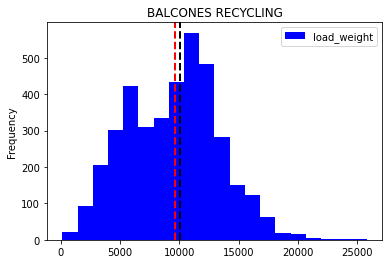

In [37]:
# # Cek distribusi data

dfBalcones.plot.hist(title='BALCONES RECYCLING', color="blue", bins=20)
plt.axvline(dfRecycle['load_weight'].mean(), color='red', linestyle='dashed', linewidth=2)
plt.axvline(dfRecycle['load_weight'].median(), color='black', linestyle='dashed', linewidth=2)
plt.show()

Note : skewness bernilai negative karena nilai mean < median

In [38]:
# Cek Skewness

dfBalcones['load_weight'].skew()

0.10148179348246143

Note : nilai skewness sebesar 0.10148179348246143 dan data masih dalam kondisi normal

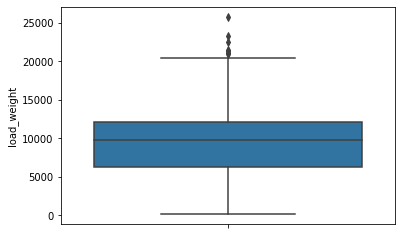

In [39]:
sns.boxplot(data=dfBalcones, y='load_weight')

# Problem 1.5 : Check data Outlier

- Nilai Percentile dan Quartile dari data dfBalcones

In [75]:
quartBal = percentile(dfBalcones['load_weight'], [25, 50, 75])
balcMin, balcMax = dfBalcones['load_weight'].min(), dfBalcones['load_weight'].max()

Q0 = quartBal[0]
Q1 = quartBal[1]
Q2 = quartBal[2]

print('Nilai Minimal dfBalcones : ', balcMin)
print('Quartile ke 0 dari dfBalcones : ', Q0)
print('Quartile ke 1 dari dfBalcones : ', Q1)
print('Quartile ke 2 dari dfBalcones : ', Q2)
print('Nilai Maximal dfBalcones : ', balcMax)

Nilai Minimal dfBalcones :  140.0
Quartile ke 0 dari dfBalcones :  6260.0
Quartile ke 1 dari dfBalcones :  9840.0
Quartile ke 2 dari dfBalcones :  12080.0
Nilai Maximal dfBalcones :  25780.0


- Nilai Extreme dfBalcones

In [41]:
IQR = Q2 - Q0
upper = Q2 + 3 * IQR
lower = Q0 + 3 * IQR

print('Nilai Extreme dari dfBalcones : ', IQR)
print('Nilai Upper dari dfBalcones : ', upper)
print('Nilai Lower dari dfBalcones : ', lower)

Nilai Extreme dari dfBalcones :  5820.0
Nilai Upper dari dfBalcones :  29540.0
Nilai Lower dari dfBalcones :  23720.0


In [42]:
# Cari data outlier berdasarkan nilai upper dfBalcones

dfBalcones.loc[dfBalcones['load_weight'] > 29540]

,load_type,load_weight,dropoff_site,date


In [43]:
recyclePerc = dfRecycle.loc[dfRecycle['load_weight'] > 29540].value_counts().sum()
recyclePerc

0

Note : tidak ada data outlier dari dfBalcones, jadi tidak perlu dihapus

# Problem 1.6 : Pengukuran Range, Variansi dan Standard Deviasi

In [44]:
# Cari Nilai Mean, Median dan Modus dari dfBalcones

bMean = dfBalcones['load_weight'].mean()
bMed = dfBalcones['load_weight'].median()
bMod = dfBalcones['load_weight'].mode()

print('Nilai Mean dari data Balcones : ', bMean)
print('Nilai Median dari data Balcones : ', bMed)
print('Nilai Modus dari data Balcones : ', bMod)

Nilai Mean dari data Balcones :  9464.652071931196
Nilai Median dari data Balcones :  9840.0
Nilai Modus dari data Balcones :  0    11880.0
dtype: float64


In [45]:
# Cari Nilai Var & Std dari dfBalcones

varBal = dfBalcones['load_weight'].var()
stdBal = dfBalcones['load_weight'].std()

print('Nilai Var dari data Balcones : ', varBal)
print('Nilai Std dari data Balcones : ', stdBal)

Nilai Var dari data Balcones :  14916926.032459863
Nilai Std dari data Balcones :  3862.243652653191


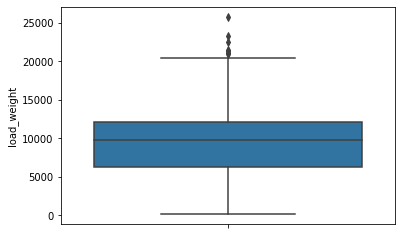

In [46]:
sns.boxplot(data = dfBalcones, y = 'load_weight')

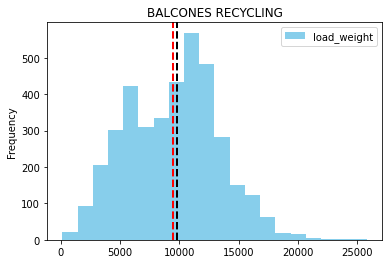

In [49]:
dfBalcones.plot.hist(title = 'BALCONES RECYCLING', color='skyblue', bins=20)
plt.axvline(dfBalcones['load_weight'].mean(), color='red', linestyle='dashed', linewidth=2)
plt.axvline(dfBalcones['load_weight'].median(), color='black', linestyle='dashed', linewidth=2)
plt.show()

note : plot data after check the outliers in `BALCONES RECYCLING` 

- Karena tidak ada data outlier dan kita masih perlu analisa ulang setelah itu, maka perhitungannya hampir sama dengan perhitungan yang diatas

In [50]:
# Cari Nilai Mean, Median dan Modus dari dfBalcones

bMean = dfBalcones['load_weight'].mean()
bMed = dfBalcones['load_weight'].median()
bMod = dfBalcones['load_weight'].mode()

print('Nilai Mean dari data Balcones : ', bMean)
print('Nilai Median dari data Balcones : ', bMed)
print('Nilai Modus dari data Balcones : ', bMod)

Nilai Mean dari data Balcones :  9464.652071931196
Nilai Median dari data Balcones :  9840.0
Nilai Modus dari data Balcones :  0    11880.0
dtype: float64


In [52]:
dfBalcones.apply(pd.Series.mode)

,load_type,load_weight,dropoff_site,date
0,RECYCLING - SINGLE STREAM,11880.0,BALCONES RECYCLING,2021-03-04


note : nilai modus dari `droppoff_site` `BALCONES RECYCLING` adalah 11880

- Data Comparison
  - Data yang diambil adalah data dari site ``

In [63]:
dfMetal = dfCopy.loc[dfCopy['load_type'] == 'RECYCLED METAL']
dfMetal

,load_type,load_weight,dropoff_site,date
1083,RECYCLED METAL,320.0,AUSTIN IRON AND METAL,2021-07-08
1314,RECYCLED METAL,520.0,AUSTIN IRON AND METAL,2021-03-02
1477,RECYCLED METAL,8260.0,ORGANICS BY GOSH,2021-03-03
2273,RECYCLED METAL,350.0,AUSTIN IRON AND METAL,2021-03-08
2529,RECYCLED METAL,280.0,AUSTIN IRON AND METAL,2021-03-09
2785,RECYCLED METAL,500.0,AUSTIN IRON AND METAL,2021-03-10
3025,RECYCLED METAL,630.0,AUSTIN IRON AND METAL,2021-03-11
3474,RECYCLED METAL,1040.0,AUSTIN IRON AND METAL,2021-03-15
4530,RECYCLED METAL,5160.0,ORGANICS BY GOSH,2021-03-22
4790,RECYCLED METAL,290.0,AUSTIN IRON AND METAL,2021-03-23


In [57]:
dfMetal.dropoff_site.unique()

array(['AUSTIN IRON AND METAL', 'ORGANICS BY GOSH', 'MRF', 'TDS LANDFILL'],
      dtype=object)

note : ada 4 site yang dikhususkan untuk pengolahan limbah `RECYCLED METAL`

In [61]:
totalMetal = dfMetal.groupby(dfMetal['dropoff_site'],sort=True).sum()
totalMetal

,load_weight
dropoff_site,
AUSTIN IRON AND METAL,22560.0
MRF,230.0
ORGANICS BY GOSH,62660.0
TDS LANDFILL,220.0


note : data pembanding yang menarik perhatian yaitu site `ORGANICS BY GOSH` karena limbah yang diolah cukup besar

In [64]:
dfOrganics = dfMetal.loc[dfMetal['dropoff_site'] == 'ORGANICS BY GOSH']
dfOrganics

,load_type,load_weight,dropoff_site,date
1477,RECYCLED METAL,8260.0,ORGANICS BY GOSH,2021-03-03
4530,RECYCLED METAL,5160.0,ORGANICS BY GOSH,2021-03-22
6445,RECYCLED METAL,17440.0,ORGANICS BY GOSH,2021-04-02
7814,RECYCLED METAL,20760.0,ORGANICS BY GOSH,2021-04-13
16644,RECYCLED METAL,11040.0,ORGANICS BY GOSH,2021-06-17


In [66]:
totalOrganics = dfOrganics['load_weight'].sum()
totalOrganics

62660.0

note : total limbah `RECYCLED METAL` yang ada di site `ORGANICS BY GOSH` adalah 62660

- Nilai Mean, Median, Modus, Variansi dan Standard Deviasi dari site `ORGANICS BY GOSH`

In [70]:
orgMean = dfOrganics['load_weight'].mean()
orgMed = dfOrganics['load_weight'].median()
orgMod = dfOrganics['load_weight'].mode()
orgVar = dfOrganics['load_weight'].var()
orgStd = dfOrganics['load_weight'].std()

print('Nilai Mean dari data ORGANICS BY GOSH : ', orgMean)
print('Nilai Median dari data ORGANICS BY GOSH : ', orgMed)
print('Nilai Modus dari data ORGANICS BY GOSH :\n', orgMod)
print('Nilai Variansi dari data ORGANICS BY GOSH : ', orgVar)
print('Nilai Standard dari data ORGANICS BY GOSH : ', orgStd)

Nilai Mean dari data ORGANICS BY GOSH :  12532.0
Nilai Median dari data ORGANICS BY GOSH :  11040.0
Nilai Modus dari data ORGANICS BY GOSH :
 0     5160.0
1     8260.0
2    11040.0
3    17440.0
4    20760.0
dtype: float64
Nilai Variansi dari data ORGANICS BY GOSH :  41652720.0
Nilai Standard dari data ORGANICS BY GOSH :  6453.891849109342


- Create Distribution Plot of `ORGANICS BY GOSH`

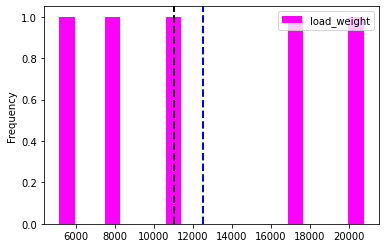

In [72]:
dfOrganics.plot.hist(Label = 'ORGANICS BY GOSH', color='magenta', bins=20)
plt.axvline(orgMean, color='blue', linestyle='dashed', linewidth=2)
plt.axvline(orgMed, color='black', linestyle='dashed', linewidth=2)
plt.show()

- Check skewness 

In [73]:
dfOrganics['load_weight'].skew()

0.2996635625809256

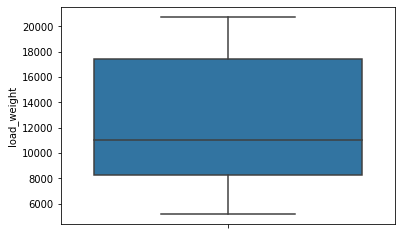

In [74]:
sns.boxplot(data = dfOrganics, y = 'load_weight')

- Nilai Percentile dan Quartile dari `ORGANICS BY GOSH`

In [76]:
quartOrg = percentile(dfOrganics['load_weight'], [25, 50, 75])
orgMin, orgMax = dfOrganics['load_weight'].min(), dfOrganics['load_weight'].max()

Q0 = quartOrg[0]
Q1 = quartOrg[1]
Q2 = quartOrg[2]

print('Nilai Minimal dfOrganics : ', balcMin)
print('Quartile ke 0 dari dfOrganics : ', Q0)
print('Quartile ke 1 dari dfOrganics : ', Q1)
print('Quartile ke 2 dari dfOrganics : ', Q2)
print('Nilai Maximal dfOrganics : ', balcMax)

Nilai Minimal dfOrganics :  140.0
Quartile ke 0 dari dfOrganics :  8260.0
Quartile ke 1 dari dfOrganics :  11040.0
Quartile ke 2 dari dfOrganics :  17440.0
Nilai Maximal dfOrganics :  25780.0


# Problem 1.7 : Confident Interval - belom

# Problem 1.8 : Analisa Uji Hipotesis

- H0 : μ `BALCONES RECYCLING` `load_weight` = μ `ORGANICS BY GOSH` `load_weight`
- H1 : μ `BALCONES RECYCLING` `load_weight` != μ `ORGANICS BY GOSH` `load_weight`

- setelah kita menganilsa dan membandingkan 2 site yaitu `BALCONES RECYCLING` dengan `ORGANICS BY GOSH`, maka kita akan menggunakan t-test untuk Analisa Uji Hipotesis

In [77]:
t_stat, p_value = stats.ttest_ind(dfBalcones['load_weight'], dfOrganics['load_weight'])

print('Hasil T-Test : ', t_stat)
print('Hasil P_Value : ', p_value)

Hasil T-Test :  -1.773048272681914
Hasil P_Value :  0.07629996166984572


-3184.743512439727
22114.04765630212


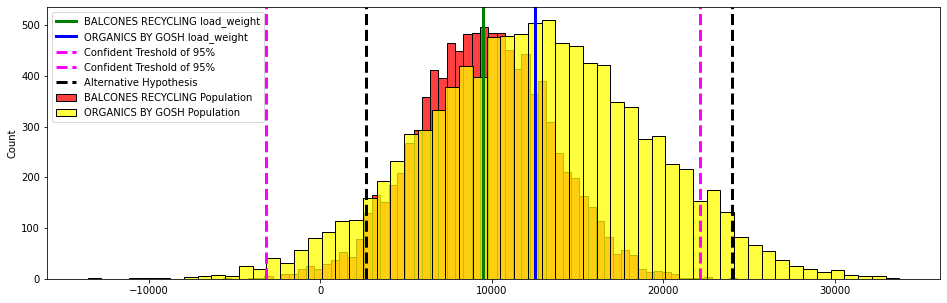

In [81]:
# Random Sampel Populasi Limbah
balconesPop = np.random.normal(dfBalcones['load_weight'].mean(), dfBalcones['load_weight'].std(), 10000)
organicsPop = np.random.normal(dfOrganics['load_weight'].mean(), dfOrganics['load_weight'].std(), 10000)

# Interval Confident
ci = stats.norm.interval(0.95, dfBalcones['load_weight'].mean(), dfOrganics['load_weight'].std())

plt.figure(figsize=(16,5))
sns.histplot(balconesPop, label='BALCONES RECYCLING Population', color='red')
sns.histplot(organicsPop, label='ORGANICS BY GOSH Population', color='yellow')

# Mean Value
plt.axvline(dfBalcones['load_weight'].mean(), color='green', linewidth=3, label='BALCONES RECYCLING load_weight')
plt.axvline(dfOrganics['load_weight'].mean(), color='blue', linewidth=3, label='ORGANICS BY GOSH load_weight')

plt.axvline(ci[1], color='magenta', linestyle='dashed', linewidth=3, label='Confident Treshold of 95%')
plt.axvline(ci[0], color='magenta', linestyle='dashed', linewidth=3, label='Confident Treshold of 95%')

# Alternative Hypothesis
plt.axvline(balconesPop.mean() + t_stat * balconesPop.std(), color="black", linestyle='dashed', linewidth=3, label='Alternative Hypothesis')
plt.axvline(organicsPop.mean() - t_stat * organicsPop.std(), color="black", linestyle='dashed', linewidth=3)

# Ploting
plt.legend()
print(ci[0])
print(ci[1])

Note: Based on the above results, we can conclude that we failed to reject the null hypothesis that BALCONES RECYCLING and ORGANICS BY GOSH are not significantly different in handling recyclable waste.

# Question Mark - belom



1.   Teknik apa yang kamu pilih untuk handling outlier? jelaskan alasannya!
2. Apa konsep dibalik confidence interval sehingga kita dapat menggunakannya untuk menyelesaikan langkah pada nomor 7?
3. Jelaskan jenis uji hipotesis apa yang kamu terapkan dan mengapa?



- For handling the outliers I use the z-score technique. That is for finding the outliers from normal distribution
- Confidence interval is for to know how accurate the interval of our site. Usually we use 95% of confidence level or people used to say α (alpha). By this 95 per 100 confidence level it's make us confiden too about our data to not to fall away between upper and lower values
- I am using the 2 sample 2 tale because I want to know the average of load weight between organics by gosh and austin iron and metal is same or not. The hypothesis is proving that there is a significant difference between the two sites